# Bi-directional Search

The point of bidirectional search is to run two simultaneous, not parallel, search from the origin and destination node hoping that they would meet in the middle.  

**but** why?  

Imagine that you are doing BFS in a graph with a constant branching factor $b$ and depth $d$ so the complexity would be $O({d}^b)$ but what if we split that depth $d$ in half (that usually doesn't happen) so the total complexity would be $O({(d/2)}^b) + O({(d/2)}^b)$ which is in total much lower than $O({d}^b)$.  

Let's see some pictures, sorry for the paint-level editing in advance.

This is a uni-directional breadth first search.

![title](./images/Uni-BFS.png)

This is bi-directional breadth first search

![title](./images/Bi-BFS.jpg)

As you can see how many (blue) nodes that didn't contribute to the solution didn't get expanded in the bi-driectional search, skipping the expansion of more than half of the nodes.

__Bi_DIRECTIONAL_SEARCH__ ( _source_ , _destination_ ) __returns__ a route   

&emsp; // f stands for source/front expansion and b stands for destination/back expansion  

&emsp; _frontier\_f_ &larr; initialized with _source_  
&emsp; _frontier\_b_ &larr; initialized with _destination_  
&emsp; _explored\_f_ &larr; empty  
&emsp; _explored\_b_ &larr; empty  
&emsp; _collide_ &larr; _False_ &emsp;&emsp; // if front expansion overlapped with back expansion  
&emsp; _found_ &larr; _False_ &emsp;&emsp; // if we found the destination from a single expansion which if you think about it, will never happen  
&emsp; _altr\_expand_ &larr; _False_ &emsp;&emsp; // To alternate between expansion from front and back  

&emsp; __while__ _frontier\_f_ __is not__ empty __and__ _frontier\_b_ __is not__ empty __and__ __not__ _collide_ __and__ __not__ _found_ __do__  
&emsp;&emsp; __if__ _altr\_expand_ __then__  
&emsp;&emsp;&emsp; _node_ &larr; _frontier\_f_.pop()   
&emsp;&emsp;&emsp; __add__ _node_ __to__ _explored_f_  
&emsp;&emsp;&emsp; __for__ _child_ __in__ _node_.expand() __do__  
&emsp;&emsp;&emsp;&emsp; __if__ _child_ __in__ _explored\_f_ __then__ continue  
&emsp;&emsp;&emsp;&emsp; __if__ _child_ __is__ _destination_ __then__  
&emsp;&emsp;&emsp;&emsp;&emsp; _route_ &larr; _child_.route()  
&emsp;&emsp;&emsp;&emsp;&emsp; _found_ &larr; _True_  
&emsp;&emsp;&emsp;&emsp; __if__ _child_ __is in__ _explored_b_ __then__ &emsp;//overlapping -- met in the middle  
&emsp;&emsp;&emsp;&emsp;&emsp; _route_ &larr; _child_.route() + reverse( _overlapped_.route() )  
&emsp;&emsp;&emsp;&emsp;&emsp; _collid_ &larr; _True_  
&emsp;&emsp;&emsp;&emsp; __add__ _child_ __to__ _frontier\_f_  
&emsp;&emsp; __else__  
&emsp;&emsp;&emsp; _node_ &larr;  _frontier\_b_.pop()  
&emsp;&emsp;&emsp; __add__ _node_ __to__ _explored\_b_  
&emsp;&emsp;&emsp; __for__ _child_ __in__ _node_.expand() __do__  
&emsp;&emsp;&emsp;&emsp; __if__ _child_ __in__ _explored\_b_ __then__ continue  
&emsp;&emsp;&emsp;&emsp; __if__ _child_ __is__ _destination_ __then__  
&emsp;&emsp;&emsp;&emsp;&emsp; _route_ &larr; _child_.route()  
&emsp;&emsp;&emsp;&emsp;&emsp; _found_ &larr; _True_  
&emsp;&emsp;&emsp;&emsp; __if__ _child_ __is in__ _explored_f_ __then__ &emsp;//overlapping -- met in the middle  
&emsp;&emsp;&emsp;&emsp;&emsp; _route_ &larr; reverse( _child_.route() ) + _overlapped_.route()  
&emsp;&emsp;&emsp;&emsp;&emsp; _collid_ &larr; _True_  
&emsp;&emsp;&emsp;&emsp; __add__ _child_ __to__ _frontier\_b_  
&emsp; __return__ _route_

# The Algorithm

In [1]:
import osmnx as ox
import time, sys
from collections import deque
from tqdm import tqdm
from utilities import *

let's load our beloved UofT map

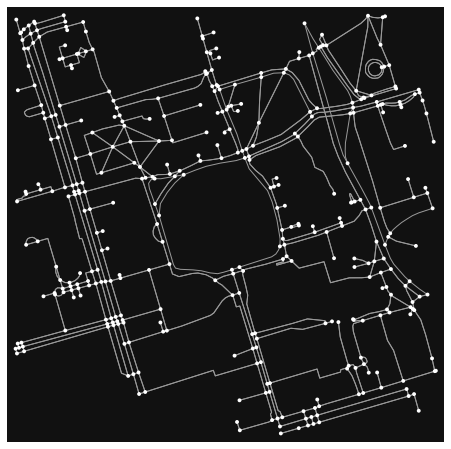

In [2]:
location_point = (43.661667, -79.395)
G = ox.graph_from_point(location_point, dist=300, clean_periphery=True, simplify=True)
fig, ax = ox.plot_graph(G)

Here you need to specify which node from our graph is the source (Equestrian Statue of Edward VII) and which is the destination node (Bahen Center of Technology). You can do so by acquiring the decimal coordinates of the desired node and use [```osmnx.distance.get_nearest_node```](https://osmnx.readthedocs.io/en/stable/osmnx.html#osmnx.distance.get_nearest_node) method

I used the aforementioned method and found that the nodes for destination and source are 389677909, 55808290 respectively

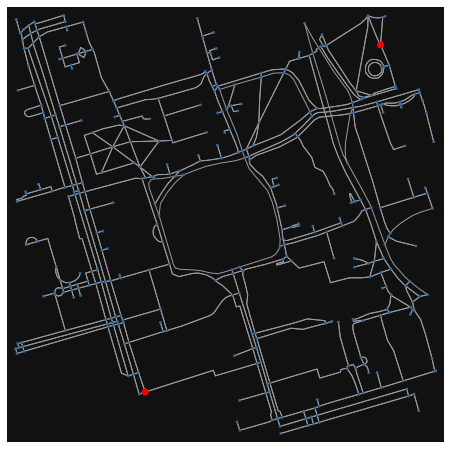

In [3]:
highlighted = [389677909, 55808290]

# marking both the source and destination node

nc = ['r' if node in highlighted else '#336699' for node in G.nodes()]
ns = [50 if node in highlighted else 8 for node in G.nodes()]
fig, ax = ox.plot_graph(G, node_size=ns, node_color=nc, node_zorder=2)

In [4]:
draw_map(G, highlight = highlighted)

Map(center=[43.6618621, -79.3941032], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_titl…

In [5]:
source(Node)

We are implementing A* based bi-directional search algorithm, so our criteria of expansion, either from source frontier or destination destination frontier is the A* heuristic.  

Please note the following:  

1. the origin and destination for the expansion from destionation node are reversed
2. `f` stands for frontier (source expansion), `b` stands for back (destination expansion)


In [6]:
# first define the origin/source nodes as Node
origin = Node(graph = G, osmid = 55808290)
destination = Node(graph = G, osmid = 389677909)
destination_b = origin
origin_b = destination

In [7]:
toGoal_f, toDestination_f = astar_heuristic(G, origin.osmid, destination.osmid, measuring_dist = haversine_distance)
toGoal_b, toDestination_b = astar_heuristic(G, origin_b.osmid, destination_b.osmid, measuring_dist = haversine_distance)

In [8]:
%%time
route = []

# uncomment the following line to see the progress bar

bar = tqdm(total=len(G))

f_value = lambda node: toGoal_f[node.osmid] + toDestination_f[node.osmid]
b_value = lambda node: toGoal_b[node.osmid] + toDestination_b[node.osmid]

frontier_f = list()
frontier_b = list()

frontier_f.append(origin)
frontier_b.append(origin_b)

explored_f = list()
explored_b = list()

collide = False
found = False
altr_exapnd = False # to alternate between front and back

while frontier_f and frontier_b and not collide and not found:
    bar.update(1); time.sleep(0.05)
    
    if altr_exapnd:
        # remove node_f from frontier_f to expand it
        node = min(frontier_f, key = lambda node : f_value(node))
        frontier_f.remove(node)
        explored_f.append(node)
        
        for child in node.expand():
            if child in explored_f: continue
            
            if child == destination:
                route = child.path()
                found = True
                break

            # checking for collusion with the target expansion
            if child in explored_b:
                overlapped = next((node for node in explored_b if node == child))
                # we don't take the overlapped node twice
                route = child.path()[:-1] + overlapped.path()[::-1]
                collide = True
                break

            frontier_f.append(child)
        altr_exapnd = False
    else:
        # remove node_b from frontier_b to expand it
        node = min(frontier_b, key = lambda node : b_value(node))
        frontier_b.remove(node)
        explored_b.append(node)
        
        for child in node.expand():
            if child in explored_b: continue
            if child == destination_b:
                route = child.path()[::-1] # we reverse the list because we expand from the back
                found = True
                break

            if child in explored_f:
                overlapped = next((node for node in explored_f if node == child), None)
                route = overlapped.path()[:-1] + child.path()[::-1]
                collide = True
                break

            frontier_b.append(child)
        altr_exapnd = True


bar.close()
print("The route is \n\n",route)

 14%|█▍        | 54/379 [00:02<00:17, 18.64it/s]

The route is 

 [55808290, 304891685, 55808284, 1252869817, 55808239, 389678268, 4953810915, 389678267, 24960090, 389678273, 1258698113, 389678151, 389678142, 2143489694, 389678141, 2143488528, 389678140, 249991437, 3707407641, 24960080, 6028561924, 6028561921, 389678131, 6028562356, 854322047, 389677908, 749952029, 389677909]
CPU times: user 65.4 ms, sys: 23.9 ms, total: 89.3 ms
Wall time: 2.91 s


remember that we had to expand about 80 nodes in the normal astar search algorithm instead of 50 nodes here, so we have eliminated about half of the search space

In [9]:
draw_route(G, route)

Map(center=[43.6618621, -79.3941032], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_titl…

This route doesn't seem to be right? in the middle of the route there is something irregular in the direction of the "ants" that is because when two nodes from source and target expansion collided and each of them is originating from different origin so you need to reverse the route of one of them so you could have one way route directly from source to destination. After this reversing one of the routes, that route breaks because it is not always the case that there is an edge from $A$ to $B$ and edge from $B$ to $A$ so we need a new route between $B$ and the node after $A$ instead of $A$ so we could have feasible route in our map.

More discussion and how we fixed that exactly in implementation notes.

In [10]:
# let's fix that
route = one_way_route(G, route)

In [11]:
cost(G, route)

1212.823

In [12]:
draw_route(G, route)

Map(center=[43.6618621, -79.3941032], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_titl…

see how we have deleted the edge that caused the irregularity in our map and replaced it with another alternative that keep the route coherent.  

This is a heuristic and if you can think of any other way please don't hesitate to open an issue/PR and discuss it with us.

## Notes  

### About the algorithm
* As you can see we alternate between expansion from the front frontier and back frontier until the two frontiers collide at the middle and then stitch the two routes of the colliding nodes and voila you get your route.
* This alternation is one way to implement bi-directional, but here is another one where the **alternation** between front expansion and back expansion based on a heuristic not turn by turn.
* The heuristic will compute a value for the node to be expanded from the front and the node to be expanded from the back and choose which one to expand.
* As example you can check the length of edge between the parent node and the node to be expanded at the two frontiers, and choose the frontier that makes you take the edge with the minimum length -- this is how bi-directional dijkstra is usually implemented in literature and once you choose a certain frontier you expand and relax and implement the typical dijkstra algorithm.

---

### About the implementation
* The graph is multi-digraph as you probably know, so we can have an edge from "a" to "b" but not from "b" to "a", in other words; one way street or two way street.  
* When the collusion happens between front expansion and expanded nodes at the back, we get a route from source to the node and a route from destination to the node and then reverse that route from destination to the route, to have a single route from source to destination.
* When we reverse the destination route, we have no idea of edges between this new sequence of nodes whould have edge when reversed, but we are sure they have an edge in the other direction -- one way and two way streets.
* We handle that by try the original sequence in the route list, if two consecutive nodes produced an exception they we reverse them and get the edge in the other direction -- which maybe another edge completely.
* That is why the ant path changes its direction at the middle of the route.  
* This can be solved by check the validity of the reversed route and discard the route if there is only a one street way.

In our example we have and edge from 24960080 to 3707407641 but we don't have an edge from 3707407641 to 24960080.
That is why we don't use [`ox.plot_graph_route`](https://osmnx.readthedocs.io/en/stable/osmnx.html#osmnx.plot.plot_graph_route) because it can't handle this situation

So the above algorithm may fail on some instances but the fix is very easy but super ugly and would destruct the "clearity" of the code so we skipped it, but here is what you want to do:

1. After collusion check the validity of the reversed route
2. If it is invalid, delete the node that caused the collusion from the graph and proceed to the next iteration

OR

Fix that route by deleting the node from the route that caused the discontinuity and find the shortest path that would replace that gap between the node before and the node after using `shortest_path_with_failed_nodes`, so the final route would be approximation for the actual search result but pretty good AND correct approximation.

So as you can see the algorithms for SP are very easy and intuitive, but you need to deal with a lot of corner cases to deal with multigraphs.

